<h1>Computer practical</h1>

# Part 2: Option pricing
In the current computer practical, we will use Monte Carlo simulation to price options on stock. We start with the celebrated Black-Scholes model and continue with other models. In all models, we will follow almost the same route to emphasize similarities and differences between models.

The price of European type options, like call and put, can be computed using expectation under the risk-neutral measure as
$$\begin{align*}
V(0) = e^{-rT}\mathbb{E}^Q_0\left[ \Phi(S_T) \right].
\end{align*}$$ 
Here $S_t$ is a random process of stock price, $S_T$ is a stock price at time $T$, and $\Phi(S_T)$ is a payoff function. $r$ is a risk-free rate.
Let us express this expectation in terms of integral.
$$\begin{align*}
V(0) = e^{-rT}\mathbb{E}^Q_0\left[ \Phi(S_T) \right] = e^{-rT}\int_0^\infty  \Phi(S_T) \phi(S_T) dS_T,
\end{align*}$$ 
where $\phi(S_T)$ is a probability density function (PDF). In most cases, we do not know the analytical expression for PDF. We can, however, approximate it by an empirical PDF obtained by Monte Carlo simulations. MC simulation gives discrete observations, $S_i$, at maturity $T$, and the corresponding empirical PDF is a sum of Dirac delta functions $\delta(x - S_{i,T})$
$$\begin{align*}
\phi_e(S_T) = \frac{1}{N}\sum_{i=1}^N \delta(S_T - S_i).
\end{align*}$$ 
The empirical PDF converges to the actual PDF as $N$ goes to infinity in the sense that the following integral converges to the desired expectation.
$$\begin{align*}
\int_0^\infty  \Phi(S_T) \phi_e(S_T) dS_T \underset{N\rightarrow \infty}\rightarrow
 \int_0^\infty  \Phi(S_T) \phi(S_T) dS_T.
\end{align*}$$ 
Thus, we can approximate the expectation as
$$\begin{align*}
V(0) &= e^{-rT}\mathbb{E}^Q_0\left[ \Phi(S_T) \right] \approx e^{-rT}\int_0^\infty  \Phi(S_T) \phi_e(S_T) dS_T\\
& = e^{-rT}\int_0^\infty  \Phi(S_T) \frac{1}{N}\sum_{i=1}^N \delta(S_T - S_i) dS_T \\
& = e^{-rT}\frac{1}{N}\sum_{i=1}^N \Phi(S_i),
\end{align*}$$ 
i.e. by computing a discounted mean of the payoff function with the generated values of stock price $S_i$.

### Utility functions
In this part we will use a number of analytical functions. They are not excesively complicated but may require too much time to program them propely. These functions are provided in file 'utilities.py'. In order to use them, we need to import them in the very same way we imported other packages.

In [1]:
# Import Python packages
import numpy as np  # Load Numpy package and call it 'np'
import matplotlib.pyplot as plt # Load Pyplot as 'plt'
import utilities as ut # Load the utility functions

## 4 Black-Scholes model
### Call and put prices, comparison to Black-Scholes formula
***
### Exercise 11 (Black-Scholes)
> Compute European call and put prices using Monte Carlo simulation code from the previous practical for Geometrical Brownian motion under the risk-neutral measure
$$\begin{align*}
dS_t &= (r-c) S_t dt + \sigma S_t dW & S(0) & = S_0,
\end{align*}$$
where $r$ is a risk-free rate, $c$ is a continues dividend rate, $\sigma$ is a volatility. The payoff functions are
$$\begin{align*}
\Phi(S) = 
\begin{cases} 
	(S-K)^+ & \text{call},\\
	(K-S)^+ & \text{put}.
\end{cases}
\end{align*}$$

As a first step, generate the observations of stock price $S(T)$ at maturity $T$.

In [2]:
S0 = 1.     # Stock price
r = 0.03    # Risk-free rate 
c = 0.01    # Consumtion/dividend rate 
v = 0.2     # Volatility
T = 1.      # Time to maturity
npath = 10000
nstep = 100
dt = T/nstep
S = S0*np.ones((nstep+1,npath))

for i in range(0,nstep):
    ZH = np.random.normal(size=npath//2)
    Z = np.r_[ZH,-ZH] # antithetic sampling
    dS = (r-c)*S[i,:]*dt + v*np.sqrt(dt)*S[i,:]*Z
    S[i+1,:] = S[i,:] + dS
    
ST = S[-1,:]

> Any code can contain bugs. The first thing one usually checks, if the code produces the right results for simple cases.
Compute the forward price of the stock $F(T) = \mathbb{E}_0[S(T)]$ at maturity $T=1$ and compare it to the analytical expression
$$\begin{align*}
	F(T) &= e^{(r-c)T}S(0).
\end{align*}$$

In [3]:
Fmc = np.mean(ST)           # MC forward price
Fan = S0*np.exp((r-c)*T)    # Analytic forward price
print(Fmc, Fan)

1.0200303656874534 1.0202013400267558


> Compute the prices of call and put options for a number of strikes. The expectation is approximated as shown in the introduction.
$$\begin{align*}
	V(0) &= e^{-rT}\frac{1}{N}\sum_{i=1}^N \Phi(S_i).
\end{align*}$$

In [4]:
# Call and put
K = np.linspace(0.8, 1.2, 9) * S0
C = np.zeros(K.shape)
P = np.zeros(K.shape)
for i in range(0,K.size):
    C[i] = np.exp(-r*T) * np.mean(np.maximum(ST - K[i],0))
    P[i] = np.exp(-r*T) * np.mean(np.maximum(K[i] - ST,0))

A second check that we can do is to verify the put-call parity, which is also model independent.
> ### Put-Call parity
> Check the put-call parity. Plot the graph for the difference between call and put prices $C(K)-P(K)$ for different strikes $K$ and compare it to $e^{-cT}S(0) - e^{-rT}K$.

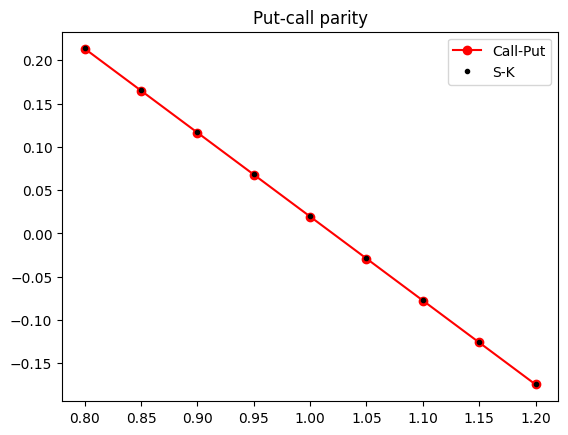

In [5]:
plt.plot(K,C-P,'o-r', label = 'Call-Put')
plt.plot(K,S0*np.exp(-c*T) - K*np.exp(-r*T),'.k', label = 'S-K')
plt.legend()
plt.title('Put-call parity')
plt.show()

### Comparison to Black-Scholes formula
In case of GBM, we can use an analytical solution to compare to our Monte Carlo simulations. The celebrated Black-Scholes formula
$$\begin{align*}
	V(0) &= \psi\left(e^{-cT}S\mathcal{N}(\psi d_1) - e^{-rT}K\mathcal{N}(\psi d_2) \right)\\
	d_1 & = \frac{\ln S/K + (r-c)T + \frac{\sigma^2 T}{2}}{\sigma\sqrt{T}} \\
	d_2 & = d_1 - \sigma\sqrt{T}\\
	\psi & = 
	\begin{cases}
		+1 & \text{for call}\\
		-1 & \text{for put}.
	\end{cases}
\end{align*}$$ 
is given in the function
```python
ut.bsVanilla(K,T,pc,S0,r,c,v)
```
The function takes as input the current stock price $S$, a vector of strikes $K$, risk-free rate $r$, dividend rate $c$, volatility $v$, time to maturity $T$, and put or call indicator (-1 for put and +1 for call). Feel free to investigate the function code or write your own version.
> Plot on the graph the Monte Carlo prices of call and put for different strikes together with the prices of Black-Scholes formula.

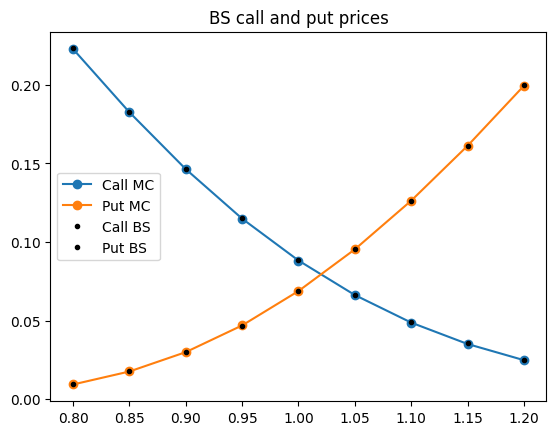

In [6]:
Cbs = ut.bsVanilla(K,T,1,S0,r,c,v)
Pbs = ut.bsVanilla(K,T,-1,S0,r,c,v)

plt.plot(K,C,'o-', label = 'Call MC')
plt.plot(K,P,'o-', label = 'Put MC')
plt.plot(K,Cbs,'.k', label = 'Call BS')
plt.plot(K,Pbs,'.k', label = 'Put BS')
plt.legend()
plt.title('BS call and put prices')
plt.show()

### Implied volatility
It is a market standard to quote the price of European options in terms of the volatility. For this, traders use the Black-Scholes formula. All other parameters are usually readily available on the market. Moreover, the stock price is most volatile, and by quoting volatility to the counterparty traders avoid the dependency on the stock price. When the deal is finalized, the actual stock price at that moment is entered into the formula. 

We will use the Black-Scholes formula to compute the volatility implied from your MC call and put prices and plot it as a function of strike. Function
```python
ut.bsimpvol(K,T,pc,S,r,c,price)
```
does this. The function takes the same arguments as 'bsVanilla', except for the volatility, plus the prices of the options and returns the corresponding implied volatility.
> Compare on the graph the implied volatility and the Black-Scholes input volatility that we used in our simulations for different strikes.

In [ ]:
vc = ut.bsimpvol(K,T,1,S0,r,c,C)
vp = ut.bsimpvol(K,T,-1,S0,r,c,P)

plt.plot(K,vc,'o-',label = 'Call')
plt.plot(K,vp,'o-',label = 'Put')
plt.plot(K,v*np.ones(K.shape),'o-r',label = 'BS')
plt.legend()
plt.show()

## 5 Stochastic volatility models
***
### Exercise 12 (SABR model)
> In this exercise we price the European options with the SABR model and look at the differences with GBM from different prospectives.

> Use the Monte Carlo framework for SABR developed in the first practical to compute stock observations $S(T)$ at maturity.

In [ ]:
S0 = 1.
r = 0.03
c = 0.01
A0 = 0.2
beta = 1
rho = -0.7
eta = 0.5
T = 1.
F0 = S0*np.exp((r-c)*T)
npath = 10000
nstep = 100
dt = T/nstep
CH = np.array([[1., rho], [rho, 1.]])
L = np.linalg.cholesky(CH)
F = F0*np.ones((nstep+1, npath))
A = A0*np.ones((nstep+1, npath))
for i in range(0,nstep):
    ZH = np.random.normal(size=(2,npath//2))
    ZA = np.c_[ZH,-ZH] # antithetic sampling
    Z = L @ ZA
    dF = A[i,:] * (F[i,:]**beta) *Z[0,:] * np.sqrt(dt)
    F[i+1,:] = np.maximum(F[i,:] + dF,1e-3)
    dA = A[i,:] * Z[1,:] * eta * np.sqrt(dt)
    A[i+1,:] = np.maximum(A[i,:] + dA,0)
     
ST = F[-1,:]

> Check that the simulated forward price is in line with the analytical formula. 

In [ ]:
# Forward price
Fmc = np.mean(ST)           # MC forward price
Fan = S0*np.exp((r-c)*T)    # Analytic forward price
print(Fmc, Fan)

> Compute the prices of call and put options for a number of strikes. The expectation is approximated as shown in the introduction.
$$\begin{align*}
	V(0) &= e^{-rT}\frac{1}{N}\sum_{i=1}^N \Phi(S_i).
\end{align*}$$

In [ ]:
# Call and put
K = np.linspace(0.8, 1.2, 9) * S0
C = np.zeros(K.shape)
P = np.zeros(K.shape)
for i in range(0,K.size):
    C[i] = np.exp(-r*T) * np.mean(np.maximum(ST - K[i],0))
    P[i] = np.exp(-r*T) * np.mean(np.maximum(K[i] - ST,0))

> ### Put-Call parity SABR
> Check the put-call parity. Plot the graph for the difference between call and put prices $C(K)-P(K)$ for different strikes $K$ and compare it to $e^{-cT}S(0) - e^{-rT}K$.

In [ ]:
plt.plot(K,C-P,'o-r', label = 'Call-Put')
plt.plot(K,S0*np.exp(-c*T) - K*np.exp(-r*T),'.k', label = 'S-K')
plt.legend()
plt.title('Put-call parity')
plt.show()

> Plot the prices of calls and puts obtained with the SABR model and compare them to the Black-Scholes model.

In [ ]:
Cbs = ut.bsVanilla(K,T,1,S0,r,c,v)
Pbs = ut.bsVanilla(K,T,-1,S0,r,c,v)

plt.plot(K,C,'o-', label = 'Call MC')
plt.plot(K,P,'o-', label = 'Put MC')
plt.plot(K,Cbs,'.k', label = 'Call BS')
plt.plot(K,Pbs,'.k', label = 'Put BS')
plt.legend()
plt.title('SABR call and put prices')
plt.show()

> ### Implied volatility
Compute the implied volatility for SABR model. Plot it together with the Black-Scholes volatility as a function of strike. Observe the smile and the skew of the volatility $\sigma_{imp}(K)$. Play with different parameters of the SABR model to observe which parameters are responsible for the level, slope (skew), and curvature (smile) of the volatility smile.

In [ ]:
vc = ut.bsimpvol(K,T,1,S0,r,c,C)
vp = ut.bsimpvol(K,T,-1,S0,r,c,P)

plt.plot(K,vc,'o-',label = 'Call')
plt.plot(K,vp,'o-',label = 'Put')
plt.plot(K,v*np.ones(K.shape),'o-r',label = 'BS')
plt.legend()
plt.show()

### Volatility approximation
The reason why the SABR model is so popular is the existence of an analytical approximation for implied volatility in SABR model. This makes the calibration of the model to the market quotes very easy. The derivation of this approximation is very technical [Hagan 2002], and is beyond this course.
> Use function 
```python
ut.sabrVolatility(S,K,r,c,alpha,beta,rho,eta,T)
```
to compute the implied volatility using this approximation. Plot and compare them to the implied volatilities obtained from your simulations.

In [ ]:
vapp = ut.sabrVolatility(S0,K,r,c,A0,beta,rho,eta,T)

plt.plot(K,vc,'o-',label = 'Call')
plt.plot(K,vp,'o-',label = 'Put')
plt.plot(K,vapp,'o-r',label = 'Approx')
plt.legend()
plt.show()

***
###  Exercise 13 (Heston model)
> If you did the exercise for SABR model, you do not need to repeat it for Heston, unless you want to.

> In this exercise we price the European options with the Heston model and look at the differences with GBM from different prospectives.

> Use the Monte Carlo framework for Heston model developed in the first practical to compute stock observations $S(T)$ at maturity.

In [ ]:
S0 = 1.
r = 0.03
c = 0.01
V0 = 0.2**2
kappa = 1.
theta = V0
rho = -0.7
xi = 0.5
T = 1.
npath = 10000
nstep = 100
dt = T/nstep
CH = np.array([[1., rho], [rho, 1.]])
L = np.linalg.cholesky(CH)
S = S0*np.ones((nstep+1, npath))
V = V0*np.ones((nstep+1, npath))
for i in range(0,nstep):
    ZH = np.random.normal(size=(2,npath//2))
    ZA = np.c_[ZH,-ZH] # antithetic sampling
    Z = L @ ZA
    dS = (r-c)*S[i,:]*dt + np.sqrt(V[i,:]) * S[i,:] * Z[0,:] * np.sqrt(dt)
    S[i+1,:] = S[i,:] + dS
    dV = kappa * (theta - V[i,:]) * dt  + xi * np.sqrt(V[i,:]) * Z[1,:] * np.sqrt(dt)
    V[i+1,:] = np.maximum(V[i,:] + dV,0)
     
ST = S[-1,:]

> Check that the simulated forward price is in line with the analytical formula. 

In [ ]:
# Forward price
Fmc = np.mean(ST)           # MC forward price
Fan = S0*np.exp((r-c)*T)    # Analytic forward price
print(Fmc, Fan)

> Compute the prices of call and put options for a number of strikes. The expectation is approximated as shown in the introduction.
$$\begin{align*}
	V(0) &= e^{-rT}\frac{1}{N}\sum_{i=1}^N \Phi(S_i).
\end{align*}$$

In [ ]:
# Call and put
K = np.linspace(0.8, 1.2, 9) * S0
C = np.zeros(K.shape)
P = np.zeros(K.shape)
for i in range(0,K.size):
    C[i] = np.exp(-r*T) * np.mean(np.maximum(ST - K[i],0))
    P[i] = np.exp(-r*T) * np.mean(np.maximum(K[i] - ST,0))

> ### Put-Call parity Heston
> Check the put-call parity. Plot the graph for the difference between call and put prices $C(K)-P(K)$ for different strikes $K$ and compare it to $e^{-cT}S(0) - e^{-rT}K$.

In [ ]:
plt.plot(K,C-P,'o-r', label = 'Call-Put')
plt.plot(K,S0*np.exp(-c*T) - K*np.exp(-r*T),'.k', label = 'S-K')
plt.legend()
plt.title('Put-call parity')
plt.show()

> ### Call and put prices, comparison to Black-Scholes formula
> Compare the simulated prices to the Black-Scholes formula. Use the volatility of log-returns in the Black-Scholes formula.

In [ ]:
Cbs = ut.bsVanilla(K,T,1,S0,r,c,v)
Pbs = ut.bsVanilla(K,T,-1,S0,r,c,v)

plt.plot(K,C,'o-', label = 'Call MC')
plt.plot(K,P,'o-', label = 'Put MC')
plt.plot(K,Cbs,'.k', label = 'Call BS')
plt.plot(K,Pbs,'.k', label = 'Put BS')
plt.legend()
plt.title('Heston call and put prices')
plt.show()

> ### Implied volatility
Compute the implied volatility for the Heston model. Plot it together with the Black-Scholes volatility as a function of strike. Observe the smile and the skew of the volatility $\sigma_{imp}(K)$. Play with different parameters of the Heston model to observe which parameters are responsible for the level, slope (skew), and the curvature (smile) of the volatility smile.

In [ ]:
vc = ut.bsimpvol(K,T,1,S0,r,c,C)
vp = ut.bsimpvol(K,T,-1,S0,r,c,P)

plt.plot(K,vc,'o-',label = 'Call')
plt.plot(K,vp,'o-',label = 'Put')
plt.plot(K,v*np.ones(K.shape),'o-r',label = 'BS')
plt.legend()
plt.show()

## 6 Local volatility
SABR and Heston are parametric models and in many cases do not allow to fit all market quotes for all strikes and maturities exactly. There is another type of model, called Local Volatility model, which allows to fit all the available quotes on the market. In this model the volatility is a deterministic function of stock price and time, $\sigma_{loc}(S_t,t)$:
$$\begin{align*}
dS_t &= (r-c)S_t dt + \sigma_{loc}(S_t,t)S_tdW & S(0) & = S_0.
\end{align*}$$
Generally, it is a daunting task to compute the local volatility function for real quotes. We however will follow an easy way and assume that the market quotes are completely in line with the SABR model. Then we can use the SABR approximation for the Black-Scholes implied volatility to compute the local volatility function. The corresponding function 
```python
ut.sabr2LocalVol(S,K,r,c,alpha,beta,rho,nu,T)
``` 
returns the local volatility $\sigma(S_t=K,t)$ for a given vector of strikes $K$ and maturity $t$. 

Again we perform the Monte Carlo simulation is as in case of GBM. Only instead of the constant volatility, we put in the calculations the local volatility, corresponding to the current time step and the current stock price at this time and in this path.
***
### Exercise 14 (Local volatility)
> Use the Monte Carlo framework to compute stock observations $S(T)$ at maturity with the local volatility model. Note that the artificail market volatilities is generated with the SABR model. The local volatility is then computed from those "quotes" using function 
Black-Scholes implied volatility to compute the local volatility function. The corresponding function 
```python
ut.sabr2LocalVol(S,K,r,c,alpha,beta,rho,nu,T)
``` 

In [ ]:
S0 = 1.
r = 0.03
c = 0.01
v = 0.2
A0 = 0.2
beta = 1
rho = -0.7
eta = 0.5
T = 1.
npath = 10000
nstep = 100
dt = T/nstep
tgrid = np.linspace(0, T, nstep+1)
S = S0*np.ones((nstep+1, npath))
for i in range(0,nstep):
    ZH = np.random.normal(size=(1,npath//2))
    Z = np.c_[ZH,-ZH] # antithetic sampling
    lv = ut.sabr2LocalVol(S0,S[i,:],r,c,A0,beta,rho,eta,tgrid[i]) # local volatility at time t = tgrid[i] and spot S = S[i,:]
    dS = (r-c)*S[i,:]*dt + lv * S[i,:] * Z * np.sqrt(dt)
    S[i+1,:] = S[i,:] + dS
     
ST = S[-1,:]

> Check that the simulated forward price is in line with the analytical formula. 

In [ ]:
# Forward price
Fmc = np.mean(ST)           # MC forward price
Fan = S0*np.exp((r-c)*T)    # Analytic forward price
print(Fmc, Fan)

> Compute the prices of call and put options for a number of strikes. The expectation is approximated as shown in the introduction.
$$\begin{align*}
	V(0) &= e^{-rT}\frac{1}{N}\sum_{i=1}^N \Phi(S_i).
\end{align*}$$

In [ ]:
# Call and put
K = np.linspace(0.8, 1.2, 9) * S0
C = np.zeros(K.shape)
P = np.zeros(K.shape)
for i in range(0,K.size):
    C[i] = np.exp(-r*T) * np.mean(np.maximum(ST - K[i],0))
    P[i] = np.exp(-r*T) * np.mean(np.maximum(K[i] - ST,0))

> ### Put-Call parity Local volatility
> Check the put-call parity. Plot the graph for the difference between call and put prices $C(K)-P(K)$ for different strikes $K$ and compare it to $e^{-cT}S(0) - e^{-rT}K$.

In [ ]:
plt.plot(K,C-P,'o-r', label = 'Call-Put')
plt.plot(K,S0*np.exp(-c*T) - K*np.exp(-r*T),'.k', label = 'S-K')
plt.legend()
plt.title('Put-call parity')
plt.show()

> ### Call and put prices, comparison to Black-Scholes formula
> Compare the simulated prices to the Black-Scholes formula. Use the volatility of log-returns in the Black-Scholes formula.

In [ ]:
Cbs = ut.bsVanilla(K,T,1,S0,r,c,v)
Pbs = ut.bsVanilla(K,T,-1,S0,r,c,v)

plt.plot(K,C,'o-', label = 'Call MC')
plt.plot(K,P,'o-', label = 'Put MC')
plt.plot(K,Cbs,'.k', label = 'Call BS')
plt.plot(K,Pbs,'.k', label = 'Put BS')
plt.legend()
plt.title('LV: Call and put prices')
plt.show()

> ### Implied volatility
> Compute the implied volatility and compare it to Black-Scholes and to the SABR approximation.

In [ ]:
vc = ut.bsimpvol(K,T,1,S0,r,c,C)
vp = ut.bsimpvol(K,T,-1,S0,r,c,P)

plt.plot(K,vc,'o-',label = 'Call')
plt.plot(K,vp,'o-',label = 'Put')
plt.plot(K,v*np.ones(K.shape),'o-r',label = 'BS')
plt.legend()
plt.title('LV: Implied volatility')
plt.show()

vapp = ut.sabrVolatility(S0,K,r,c,A0,beta,rho,eta,T)
plt.plot(K,vc,'-',label = 'Call')
plt.plot(K,vp,'-',label = 'Put')
plt.plot(K,vapp,'o-r',label = 'SABR approximation')
plt.legend()
plt.title('LV: Volatility approximation')
plt.show()

## 7 $\diamond$ Pricing Barrier option
To show how different models affect pricing of exotic derivatives we look at barrier option pricing in SABR and local volatility models. These models give the very same European call and put prices for all strikes and maturitites. So, we may expect that the barrier prices are the same as well, but they are not. This shows that the choice of the model is very important for pricing exotic options.

A barrier option has the same payoff as vanilla option, however an Out option can be knocked out if the stock price crosses a predefined barrier during the life time of the option. If the stock price crosses the barrier at any time during the life time, the option ceases to exist, and the holder does not get anything even if the vanilla option is in the money.
The payoff of the up-and-out option for example is 
$$\begin{align*}
\Psi(S_T) &= (S_T-K)^+ \mathbb{I}(S_t<B,\forall t \leq T),
\end{align*}$$
where $\mathbb{I}(x)$ is an indicator function.

Our Monte Carlo simulation is very suitable to compute the price of such exotic. In our simulations we need only to add an additional variable for each path $i$, say $I_i$, with initial value $I_i(0) = 1$, and check at every step if the barrier $B$ is crossed. In the latter case, $I_i$ becomes zero for the rest of the life time. The expectation is then taken over the product of call payoff and this function $I_i$.

### Exercise 15 (Barrier options)
>Compute and compare the prices of barrier options in the two models. Compare the difference to the difference in vanilla call prices for the same strikes.

In [ ]:
S0 = 1.
r = 0.03
c = 0.01
A0 = 0.2
beta = 1
rho = -0.7
eta = 0.5
B = S0*1.1
T = 1.0
F0 = S0*np.exp((r-c)*T)
npath = 10000
nstep = 100
dt = T/nstep
tgrid = np.linspace(0, T, nstep+1)
CH = np.array([[1., rho], [rho, 1.]])
L = np.linalg.cholesky(CH)
S = S0*np.ones((nstep+1, npath))
F = F0*np.ones((nstep+1, npath))
A = A0*np.ones((nstep+1, npath))
I = np.ones((1,npath))          # Indicator function that the option is still alive along the path (SABR model)
Ilv = np.ones((1,npath))        # Indicator function that the option is still alive along the path (Local model)

for i in range(0,nstep):
    ZH = np.random.normal(size=(2,npath//2))
    ZA = np.c_[ZH,-ZH] # antithetic sampling
    Z = L @ ZA
    # SABR model simulation
    dF = A[i,:] * (F[i,:]**beta) *Z[0,:] * np.sqrt(dt)
    F[i+1,:] = np.maximum(F[i,:] + dF, 1e-3*F0)
    dA = A[i,:] * Z[1,:] * eta * np.sqrt(dt)
    A[i+1,:] = np.maximum(A[i,:] + dA,0)
    St = F[i+1,:] * np.exp(-(r-c)*(T-tgrid[i+1]))
    I = I * (St < B)
    # Local vol simulation
    lv = ut.sabr2LocalVol(S0,S[i,:],r,c,A0,beta,rho,eta,tgrid[i])
    dS = (r-c)*S[i,:]*dt + lv * S[i,:] * Z[0,:] * np.sqrt(dt)
    S[i+1,:] = S[i,:] + dS
    Ilv = Ilv * (S[i+1,:] < B)
     
ST = F[-1,:]
STlv = S[-1,:]

Fmc = np.mean(ST)           # MC forward price
Fmclv = np.mean(STlv)
Fan = S0*np.exp((r-c)*T)    # Analytic forward price
# Up-and-Out Call
K = np.linspace(0.8*S0, B, 10)
UOCsabr = np.zeros(K.shape)
UOClv = np.zeros(K.shape)
for i in range(0,K.size):
    UOCsabr[i] = np.exp(-r*T) * np.mean(np.maximum(ST - K[i],0) * I)
    UOClv[i] = np.exp(-r*T) * np.mean(np.maximum(STlv - K[i],0) * Ilv)
    
plt.plot(K,UOCsabr,'o-',label = 'SABR')
plt.plot(K,UOClv,'o-',label = 'Local vol')
plt.legend()
plt.title('Barrier: SABR vs. Local vol')
plt.show()

## 8 $\diamond$ Convergence of Monte Carlo simulations
We did not pay much attention to numerical aspects of Monte Carlo simulation. One interesting question in this respect can be how many paths do we need to achieve a particular accuracy in price. 
Compute the price of a call option in the Black-Scholes model with different number of paths $N$ and show that the error decreases as $1/\sqrt{N}$.

In [ ]:
r = 0.03
c = 0.01
v = 0.2
T = 1.0
K = 1.0
S0 = 1
lnpath = np.arange(10,24)
C1 = np.zeros(lnpath.shape)
C2 = np.zeros(lnpath.shape)
N = np.zeros(lnpath.shape)
for n in range(0,lnpath.size):
    npath = 2**lnpath[n]
    nstep = 10
    dt = T/nstep
    lnS1 = np.ones((nstep+1,npath))*np.log(S0)
    lnS2 = np.ones((nstep+1,npath))*np.log(S0)
    S1 = S0 * np.ones((nstep+1,npath))
    for i in range(0,nstep):
        Z1 = np.random.normal(size=(1,npath))
        ZH = Z1[:,0:npath//2]
        Z2 = np.c_[ZH,-ZH]
        dS1 = (r-c - v**2/2.0)*dt + v * Z1* np.sqrt(dt)
        dS2 = (r-c - v**2/2.0)*dt + v * Z2 * np.sqrt(dt)
        lnS1[i+1,:] = lnS1[i,:] + dS1
        lnS2[i+1,:] = lnS2[i,:] + dS2
         
    ST1 = np.exp(lnS1[-1,:])
    ST2 = np.exp(lnS2[-1,:])
    C1[n] = np.exp(-r*T) * np.mean(np.maximum(ST1-K,0))
    C2[n] = np.exp(-r*T) * np.mean(np.maximum(ST2-K,0))
    N[n] = npath
    
Cbs = ut.bsVanilla(K,T,1,S0,r,c,v)
plt.loglog(N,np.abs(C1-Cbs),'g',label = 'MC')
plt.loglog(N,np.abs(C2-Cbs),'b',label = 'MC antithetic')
plt.loglog(N,v * np.sqrt(1.0/N),'k',label = 'sqrt')
plt.legend()
plt.show()